## Final Project Submission

Please fill out:
* Student name: Arinze Iwunze 
* Student pace: Full-time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('ticks')
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kc = pd.read_csv('kc_house_data.csv')

In [3]:
kc.shape

(21597, 21)

In [4]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
kc = kc.dropna()

In [10]:
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
kc['waterfront'].unique()

array([0., 1.])

In [12]:
kc['yr_renovated'] = kc['yr_renovated'].fillna(value=kc.yr_built)

In [13]:
kc.yr_renovated

1        1991.0
3           0.0
4           0.0
5           0.0
6           0.0
          ...  
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21596       0.0
Name: yr_renovated, Length: 15762, dtype: float64

In [14]:
kc.view.value_counts()

0.0    14241
2.0      688
3.0      348
1.0      245
4.0      240
Name: view, dtype: int64

In [15]:
kc = kc.dropna(subset=['view'])

In [16]:
kc.view.isna().sum()

0

In [17]:
kc.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [18]:
kc.sqft_living.unique()

array([ 2570,  1960,  1680,  5420,  1715,  1780,  1890,  1160,  1370,
        1810,  2950,  1600,  1200,  1250,  1620,  3050,  2270,  2450,
        1710,  1400,  2320,  1190,  2330,  1090,  2060,  2300,  1660,
        2360,  1220,  2620,  4220,  3595,  1570,  1280,   990,  2290,
        2753,  3150,  1980,  2730,  2420,  1850,  1260,  1540,  2770,
        2240,  3200,  4770,  2750,  1790,  3430,  1410,  3450,  2350,
        1900,  2020,   960,  2140,  2660,  3520,  1580,  3300,  2070,
        2190,  2920,  1210,  1670,  1240,  3140,  2030,  2080,  1590,
         880,  1610,  2400,   770,  2910,  1060,  2010,  3950,  1110,
        3670,  2550,  2260,  1430,  1360,  5180,   700,  1180,  3960,
        2640,  1270,  1760,  3400,  1910,  1340,  2680,  1560,  3880,
        2590,  1120,  1970,  1950,  2380,  1050,  3130,  4090,  1490,
        2230,  2180,  1690,  1350,  1940,  1010,  1300,   910,  2440,
         900,  2714,  1720,   850,  2250,  3900,  1320,  2760,  1750,
        2220,  1480,

In [19]:
kc.sqft_basement = kc.sqft_basement.replace(to_replace='?', value=0.0)

In [20]:
kc.sqft_basement.unique()

array(['400.0', '910.0', '0.0', '1530.0', 0.0, '730.0', '300.0', '970.0',
       '760.0', '720.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '588.0', '1510.0', '990.0', '600.0', '550.0', '1000.0',
       '1600.0', '1700.0', '500.0', '700.0', '1040.0', '1010.0', '240.0',
       '290.0', '800.0', '540.0', '560.0', '840.0', '770.0', '570.0',
       '1490.0', '620.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '1310.0',
       '630.0', '2000.0', '390.0', '210.0', '1950.0', '440.0', '220.0',
       '1160.0', '580.0', '2060.0', '1820.0', '1180.0', '380.0', '1150.0',
       '1200.0', '680.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0',
       '870.0', '1250.0', '1100.0', '1400.0', '530.0', '490.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', '690.0', '270.0',
       '350.0', '935.0', '200.0', '850.0', '1470.0', '160.0', '950.0',
       '1370.0', '460.0', '50.0', '710.0', '1900.0', 

In [21]:
kc.view = kc.view.astype("int64")
#kc.waterfront = kc.waterfront.astype("bool")
kc.sqft_basement = kc.sqft_basement.astype("float64")
kc.yr_renovated = kc.yr_renovated.astype('int64')
kc.zipcode = kc.zipcode.astype('str')
kc.condition = kc.condition.astype('int64')
kc.grade = kc.grade.astype('int64')

In [22]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
id               15762 non-null int64
date             15762 non-null object
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null int64
condition        15762 non-null int64
grade            15762 non-null int64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null float64
yr_built         15762 non-null int64
yr_renovated     15762 non-null int64
zipcode          15762 non-null object
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 2.6+ MB


In [23]:
kc.date = pd.to_datetime(kc.date, format='%m/%d/%Y')

In [24]:
kc.date.head()

1   2014-12-09
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
Name: date, dtype: datetime64[ns]

In [25]:
kc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
kc.waterfront.isna()

1        False
3        False
4        False
5        False
6        False
         ...  
21591    False
21592    False
21593    False
21594    False
21596    False
Name: waterfront, Length: 15762, dtype: bool

In [27]:
kc = kc.drop('id', axis = 1)

In [28]:
kc['condition'] = kc['condition'].astype('float64')
kc['grade'] = kc['grade'].astype('float64')

In [29]:
kc['total_sqft'] = kc['sqft_living'] + kc['sqft_lot']
kc['total_sqft_in'] = kc['sqft_above'] + kc['sqft_basement']

In [30]:
kc['yr_sold'] = kc['date'].dt.year
kc['age_sold'] = kc['yr_sold'] - kc['yr_built']
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,total_sqft,total_sqft_in,yr_sold,age_sold
count,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,...,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000
mean,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,0.229984,3.410862,7.663748,...,1971.111217,82.440236,47.559177,-122.213520,1990.219579,12900.415556,1.736533e+04,2078.421774,2014.321469,43.210253
std,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.761324,0.651961,1.172238,...,29.336823,397.212626,0.138629,0.140706,684.142495,27977.230059,4.198454e+04,918.292373,0.467055,29.338710
min,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,1900.000000,0.000000,47.155900,-122.519000,399.000000,659.000000,1.452000e+03,370.000000,2014.000000,-1.000000
25%,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1952.000000,0.000000,47.469200,-122.328000,1490.000000,5100.000000,7.056250e+03,1420.000000,2014.000000,18.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,47.571000,-122.229000,1846.000000,7620.000000,9.576000e+03,1910.000000,2014.000000,39.000000
75%,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,47.677400,-122.124000,2370.000000,10107.500000,1.302200e+04,2550.000000,2015.000000,63.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.652659e+06,13540.000000,2015.000000,115.000000


In [31]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 24 columns):
date             15762 non-null datetime64[ns]
price            15762 non-null float64
bedrooms         15762 non-null int64
bathrooms        15762 non-null float64
sqft_living      15762 non-null int64
sqft_lot         15762 non-null int64
floors           15762 non-null float64
waterfront       15762 non-null float64
view             15762 non-null int64
condition        15762 non-null float64
grade            15762 non-null float64
sqft_above       15762 non-null int64
sqft_basement    15762 non-null float64
yr_built         15762 non-null int64
yr_renovated     15762 non-null int64
zipcode          15762 non-null object
lat              15762 non-null float64
long             15762 non-null float64
sqft_living15    15762 non-null int64
sqft_lot15       15762 non-null int64
total_sqft       15762 non-null int64
total_sqft_in    15762 non-null float64
yr_sold          15762 no

In [32]:
kc['age'] = 2020-kc['yr_built']

In [33]:
kc.waterfront.dtype

dtype('float64')

Making a new column describing if a column has a basement or not

In [34]:
#kc['basementYN'].dtype

In [35]:
kc['basement'] = kc['sqft_basement']!=0

In [36]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [37]:
seattle_lat, seattle_long = 47.608013, -122.335167

In [38]:
import folium
KC_map = folium.Map(location=[seattle_lat,seattle_long], zoom_start=11)

In [39]:
def haversine_vectorize(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
 
    newlon = lon2 - lon1
    newlat = lat2 - lat1
 
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
 
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [40]:
kc['distance_from_city'] = haversine_vectorize(seattle_long,seattle_lat,kc['long'],kc['lat'])

In [41]:
kc['distance_from_city']

1        12.613856
3        10.617501
4        21.759524
5        25.295727
6        33.155745
           ...    
21591     6.501158
21592    10.176637
21593    10.999537
21594     3.103628
21596     3.120019
Name: distance_from_city, Length: 15762, dtype: float64

In [42]:
airport_lat,airport_lon = 47.443546, -122.301659

In [43]:
kc['distance_from_airport'] = haversine_vectorize(airport_lon,airport_lat, kc['long'], kc['lat'])

In [44]:
kc['distance_from_airport']

1        30.859494
3        10.988905
4        27.230991
5        32.449837
6        14.995397
           ...    
21591    16.906717
21592    28.614456
21593     8.730896
21594    16.764856
21596    16.731520
Name: distance_from_airport, Length: 15762, dtype: float64

In [45]:
kc['age_sold'].values[kc['age_sold'].values <= 0] = 0.1

In [46]:
kc['basement'] = kc.basement.astype('float64')

## Outliers

Opon investigating for outliers I was able to find some in 9 columns and I removed them by using the interquartile range of the columns to detect the lower and upper bounds and then removing all points outside of this range

In [47]:
kc.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_sqft', 'total_sqft_in', 'yr_sold',
       'age_sold', 'age', 'basement', 'distance_from_city',
       'distance_from_airport'],
      dtype='object')

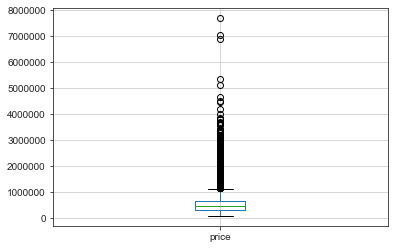

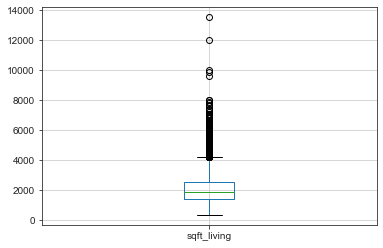

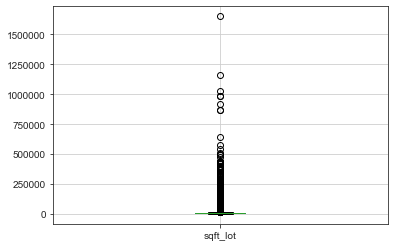

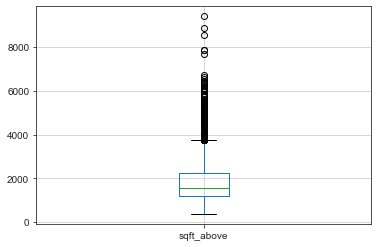

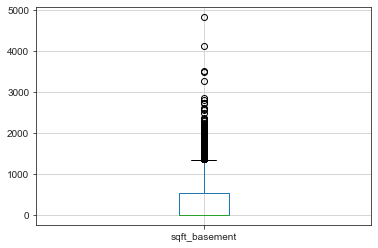

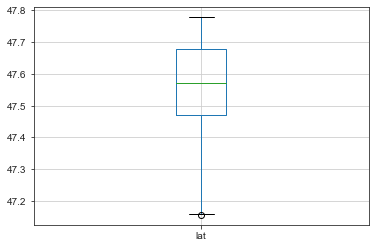

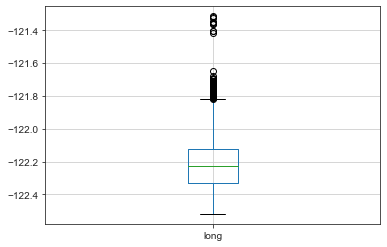

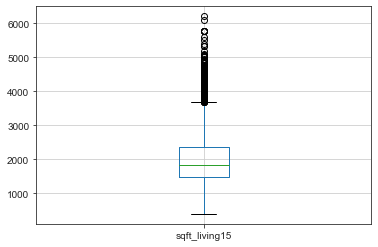

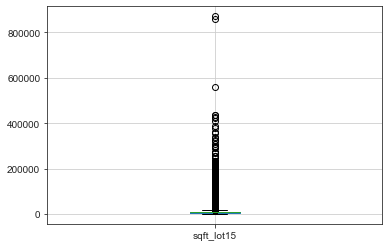

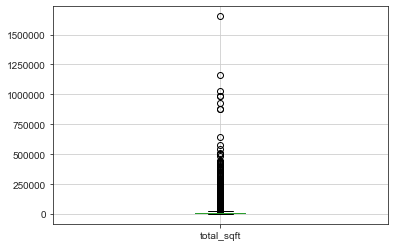

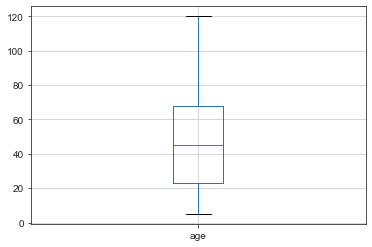

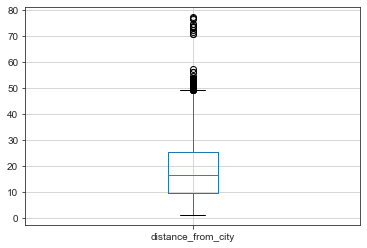

In [48]:
kt = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft',  
        'age', 'distance_from_city']

for column in kt:
    plt.figure()
    kc.boxplot([column])

In [49]:
def remove_outlier(kc, col, threshold=4):
    q1 = kc[col].quantile(0.25)
    q3 = kc[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound  = q1 - (2 * iqr)
    
    upper_bound = q3 + (2 * iqr)
    
    kc_wo = kc.loc[(kc[col] > lower_bound) & (kc[col] < upper_bound)]
    
    return kc_wo

In [50]:
kc = remove_outlier(kc, 'sqft_living')
kc = remove_outlier(kc, 'total_sqft')
kc = remove_outlier(kc, 'sqft_living15')
kc = remove_outlier(kc, 'sqft_lot')
kc = remove_outlier(kc, 'sqft_lot15')
#kc = remove_outlier(kc, 'total_sqft_in')
kc = remove_outlier(kc, 'bedrooms')
kc = remove_outlier(kc, 'lat')
kc = remove_outlier(kc, 'long')
kc = remove_outlier(kc, 'sqft_basement')
kc = remove_outlier(kc, 'distance_from_city')
kc = remove_outlier(kc, 'price')

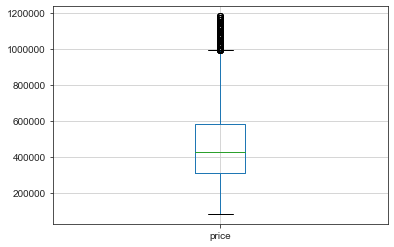

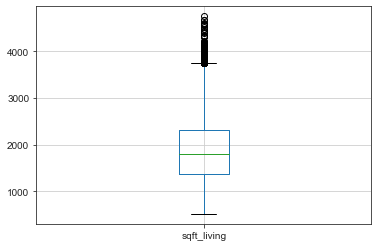

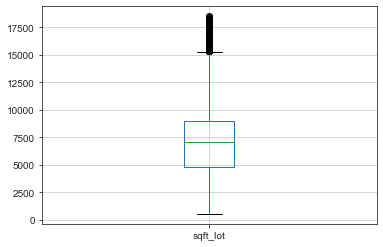

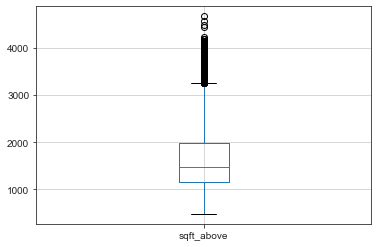

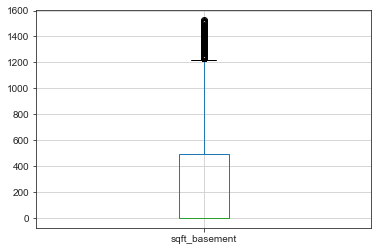

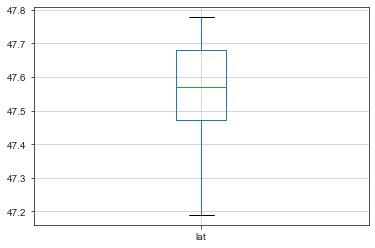

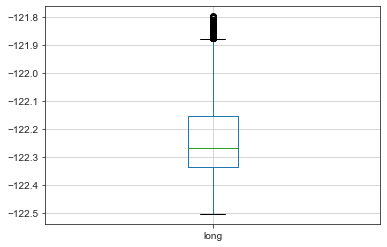

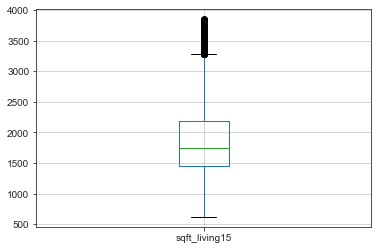

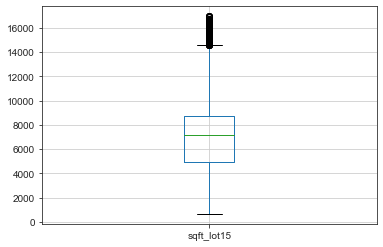

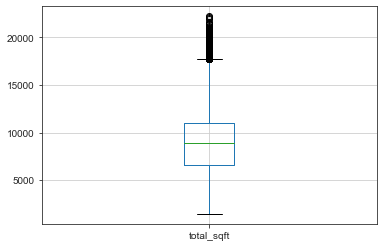

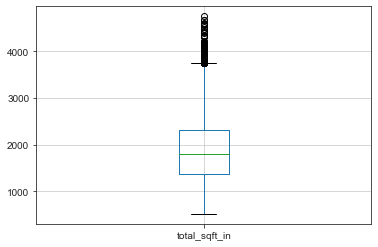

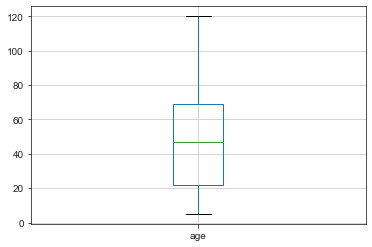

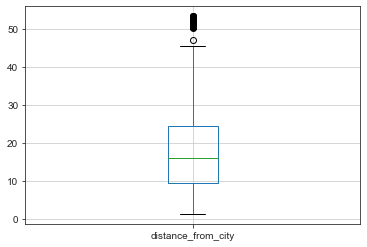

In [51]:
kt = ['price', 'sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_sqft', 'total_sqft_in', 
        'age', 'distance_from_city']

for column in kt:
    plt.figure()
    kc.boxplot([column])

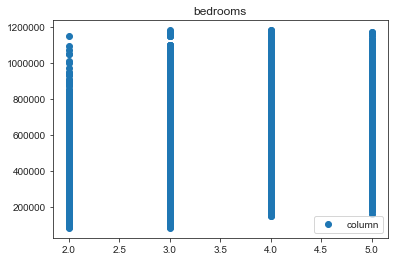

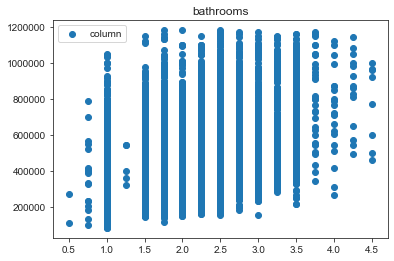

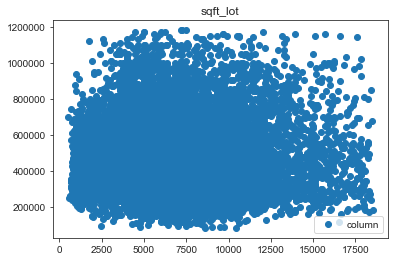

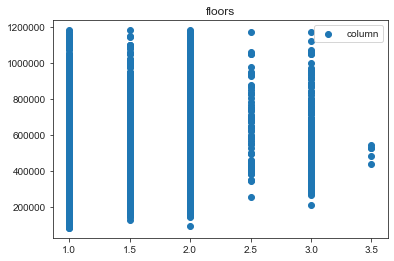

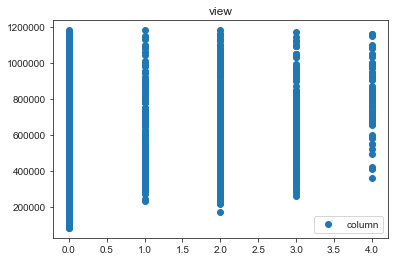

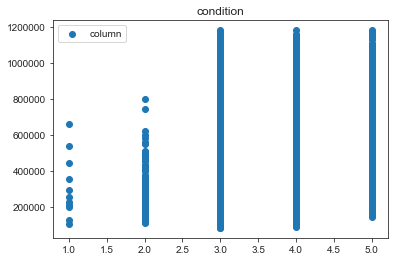

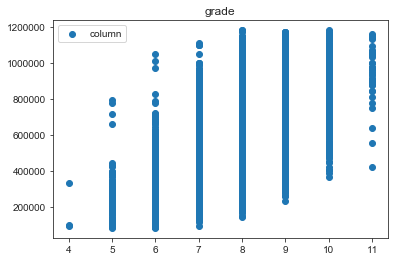

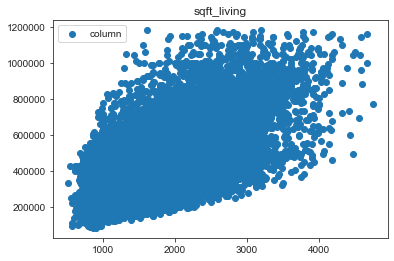

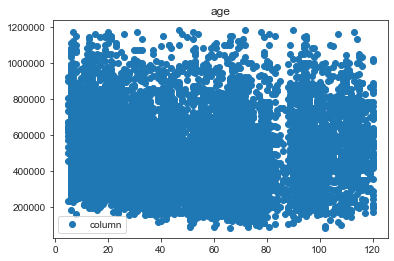

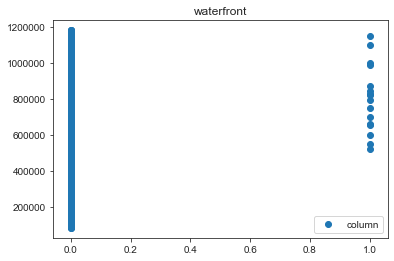

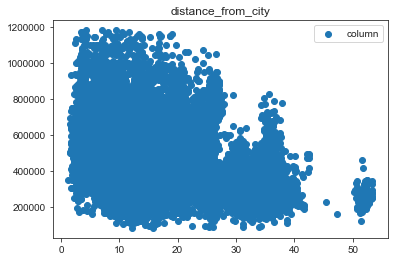

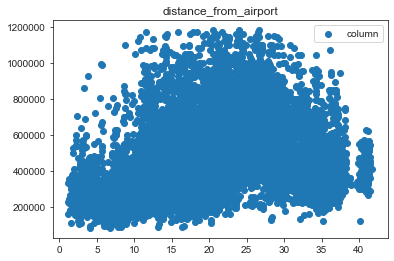

In [52]:
cols = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors',  'view', 'condition', 'grade',
     'sqft_living', 'age', 'waterfront', 'distance_from_city','distance_from_airport']
for column in cols:
    plt.figure()
    plt.scatter(kc[column], kc.price, label = 'column')
    plt.title(column)
    plt.legend()
    plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

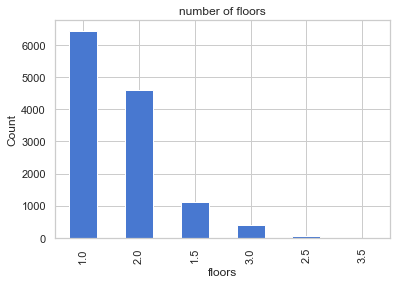

In [54]:
kc['floors'].value_counts().plot(kind='bar')
plt.title('number of floors')
plt.xlabel('floors')
plt.ylabel('Count')
sns.despine

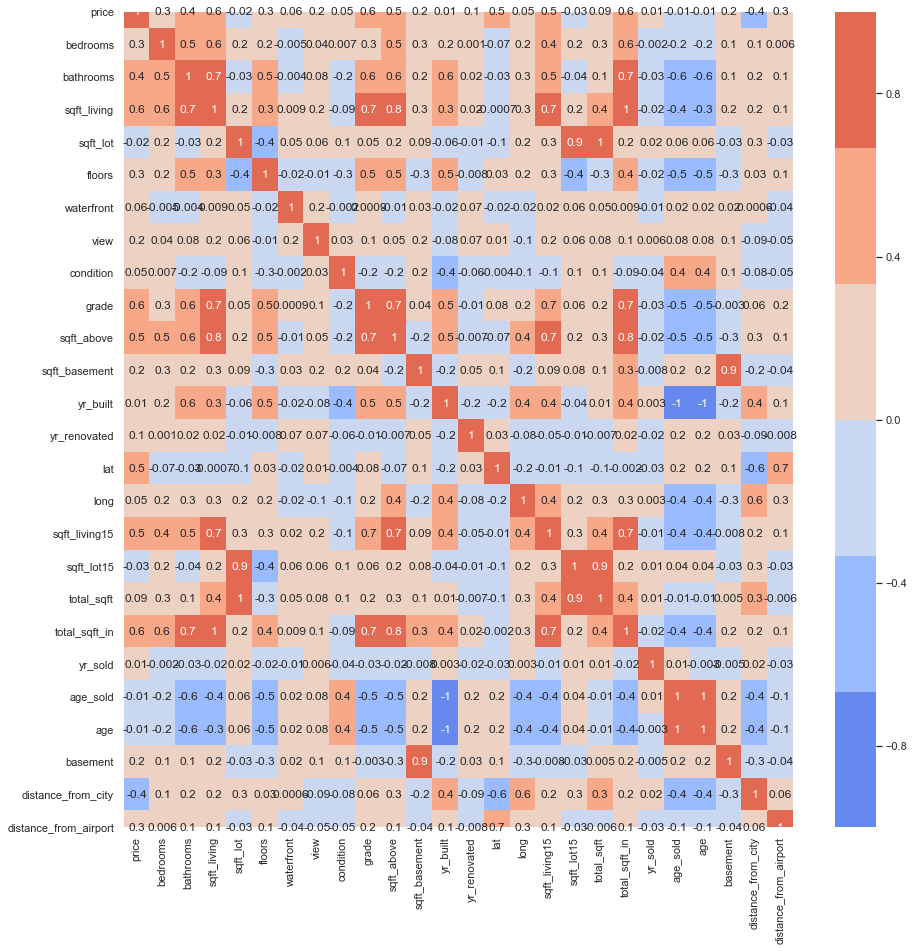

In [55]:
correlation = kc.corr()

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, annot=True, annot_kws = {'size':12}, linewidths=0, cmap=sns.color_palette('coolwarm'), vmin=-1, fmt = '.1g')

sqft_living, grade, and total_sqft_in columns all have high correlations to the price column

In [56]:
kc.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,total_sqft,total_sqft_in,yr_sold,age_sold,age,basement,distance_from_city,distance_from_airport
price,1.000000,0.271820,0.406661,0.583673,-0.021968,0.260410,0.058915,0.244170,0.046380,0.599137,...,0.517468,-0.029094,0.091170,0.579948,0.011758,-0.009761,-0.009947,0.167848,-0.385371,0.305706
bedrooms,0.271820,1.000000,0.475634,0.613387,0.208058,0.154225,-0.004780,0.038711,0.006805,0.323894,...,0.415364,0.193547,0.313488,0.609020,-0.001517,-0.175434,-0.175426,0.122565,0.146125,0.006105
bathrooms,0.406661,0.475634,1.000000,0.695893,-0.031903,0.521058,-0.004465,0.075013,-0.158170,0.597514,...,0.529090,-0.036408,0.103321,0.693291,-0.025306,-0.562063,-0.561704,0.129137,0.162646,0.106791
sqft_living,0.583673,0.613387,0.695893,1.000000,0.211686,0.348333,0.008570,0.150143,-0.088484,0.680251,...,0.740569,0.194818,0.390998,0.995370,-0.022152,-0.350254,-0.349932,0.165019,0.156433,0.105249
sqft_lot,-0.021968,0.208058,-0.031903,0.211686,1.000000,-0.363098,0.052788,0.055542,0.125045,0.052620,...,0.255514,0.875099,0.982302,0.209914,0.015789,0.056207,0.055975,-0.027895,0.323651,-0.027642
floors,0.260410,0.154225,0.521058,0.348333,-0.363098,1.000000,-0.015084,-0.014785,-0.287635,0.469671,...,0.269783,-0.368422,-0.275185,0.352030,-0.020371,-0.524263,-0.523989,-0.277367,0.031019,0.120758
waterfront,0.058915,-0.004780,-0.004465,0.008570,0.052788,-0.015084,1.000000,0.233534,-0.001962,0.000946,...,0.018087,0.058368,0.051354,0.008837,-0.010484,0.023114,0.023280,0.022987,0.000630,-0.037227
view,0.244170,0.038711,0.075013,0.150143,0.055542,-0.014785,0.233534,1.000000,0.034808,0.126116,...,0.179406,0.059256,0.081080,0.145742,0.005558,0.079473,0.079394,0.135608,-0.088345,-0.049012
condition,0.046380,0.006805,-0.158170,-0.088484,0.125045,-0.287635,-0.001962,0.034808,1.000000,-0.189411,...,-0.134773,0.135888,0.100801,-0.091306,-0.043181,0.378989,0.379694,0.117097,-0.075821,-0.053910
grade,0.599137,0.323894,0.597514,0.680251,0.052620,0.469671,0.000946,0.126116,-0.189411,1.000000,...,0.656093,0.057020,0.179921,0.679643,-0.026784,-0.486839,-0.486462,-0.002510,0.059880,0.159438


In [57]:
abs(kc.corr())>0.7

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living15,sqft_lot15,total_sqft,total_sqft_in,yr_sold,age_sold,age,basement,distance_from_city,distance_from_airport
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [58]:
categoricals = ['bedrooms', 'bathrooms','floors','view','condition','grade','waterfront']

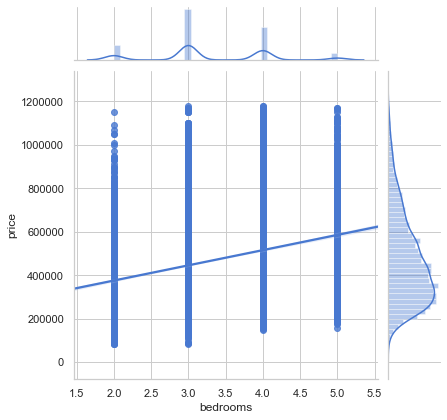

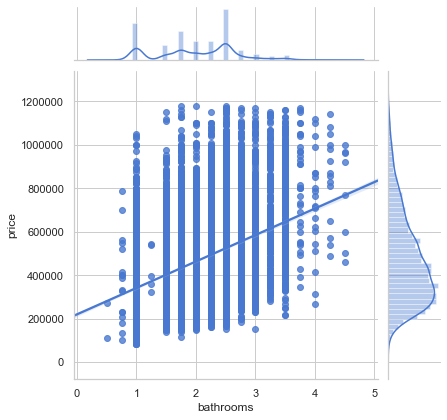

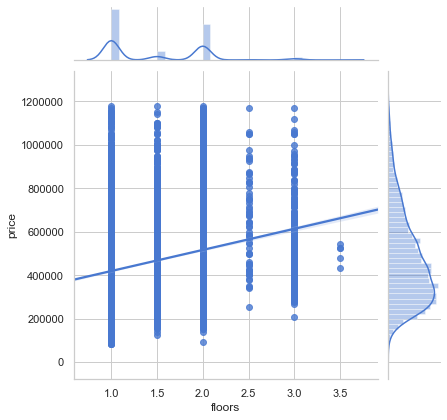

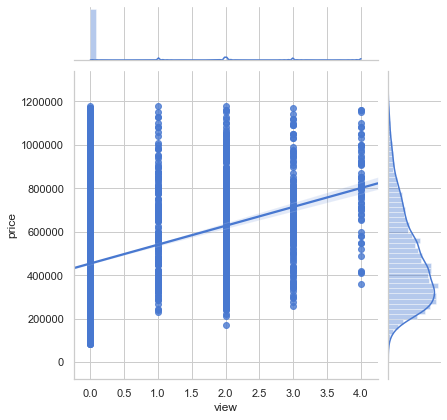

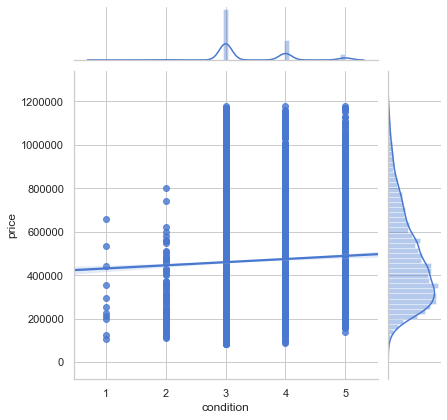

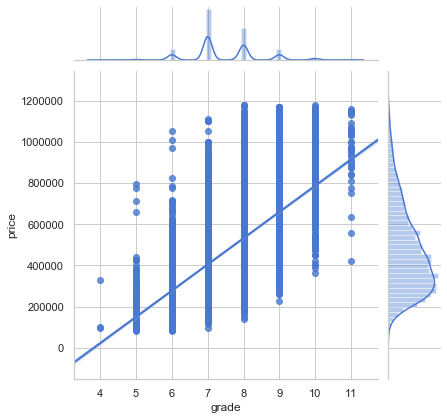

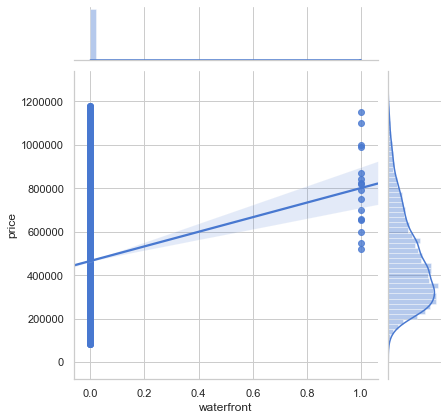

In [59]:
for col in categoricals:
    sns.jointplot(x = col,y ='price',data=kc, kind='reg')

In [60]:
nominal = ['total_sqft','sqft_living', 'total_sqft_in', 'sqft_lot', 'sqft_basement', 'floors', 'yr_built', 'yr_renovated', 'lat', 'long',
       'age', 'distance_from_city',  'distance_from_airport']

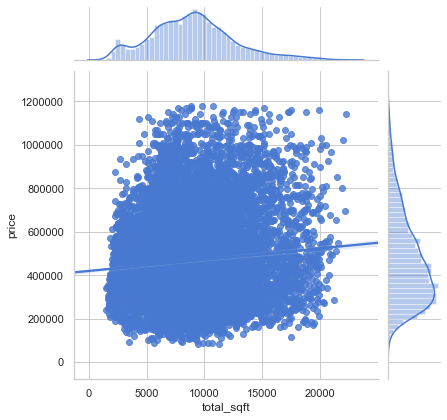

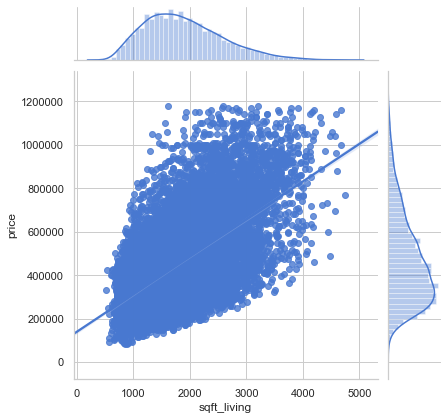

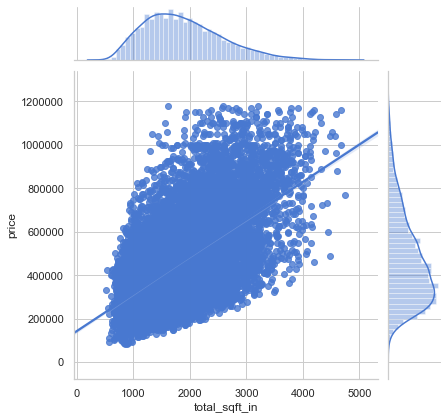

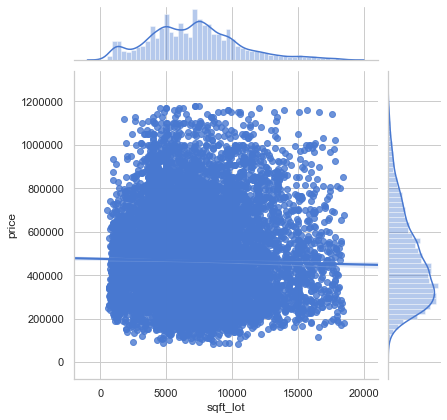

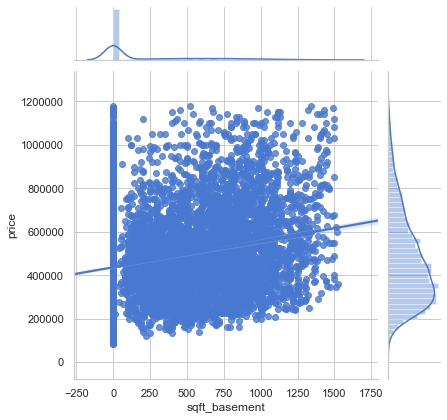

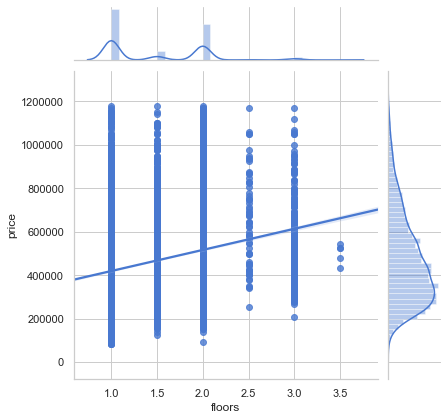

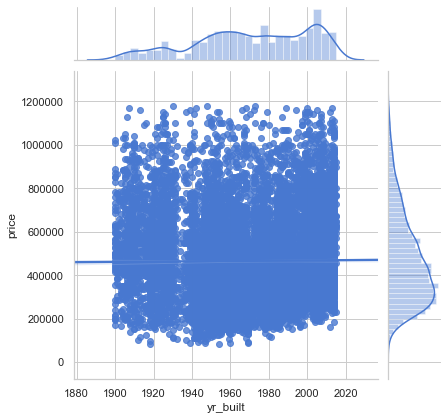

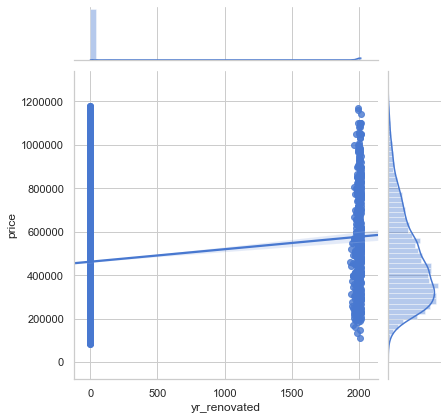

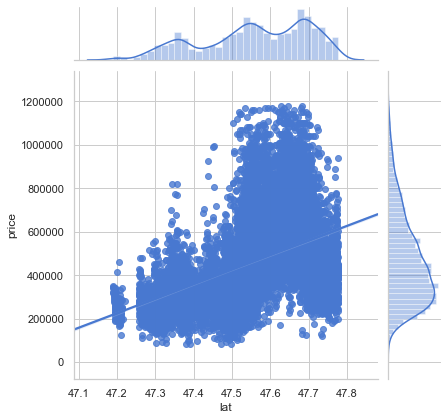

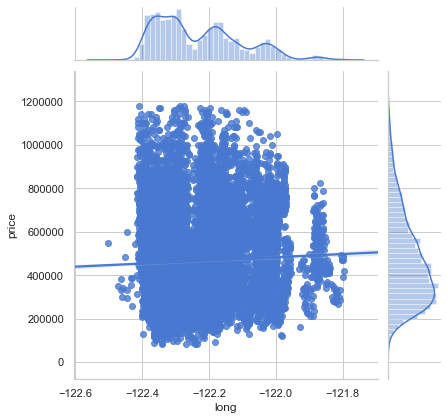

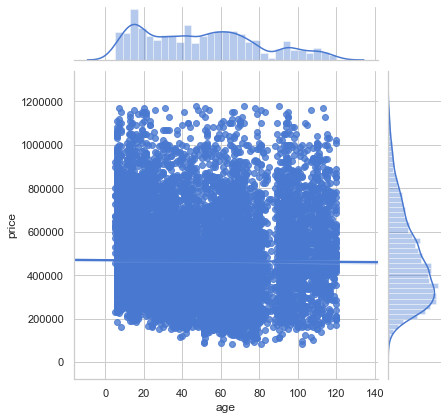

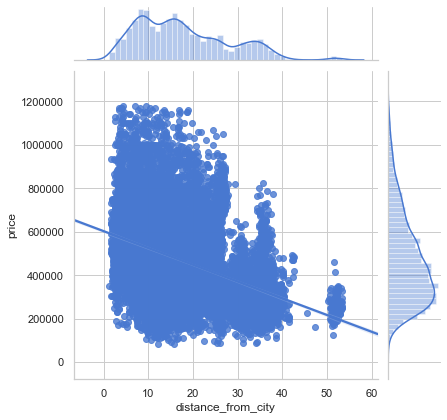

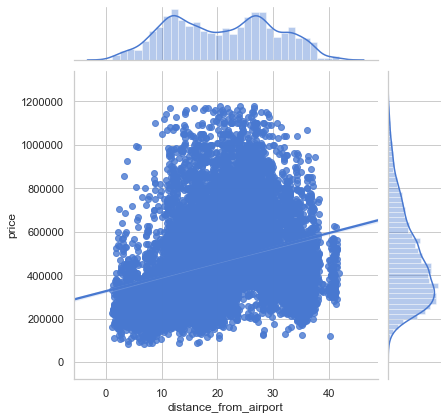

In [61]:
for col in nominal:
    sns.jointplot(x = col,y ='price',data=kc, kind='reg')

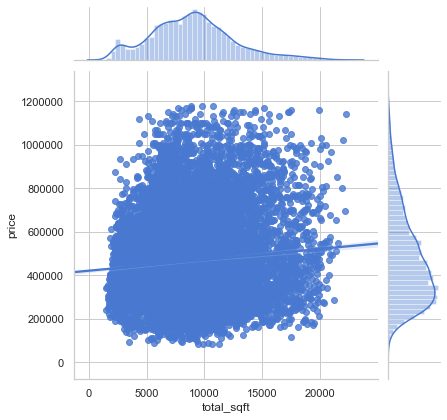

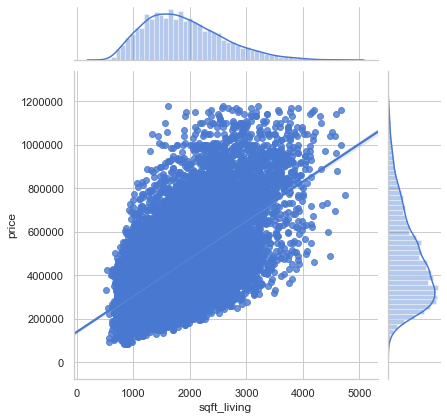

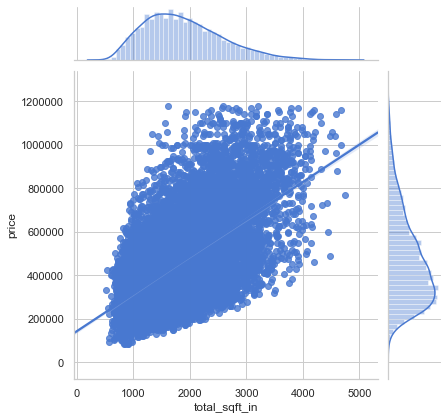

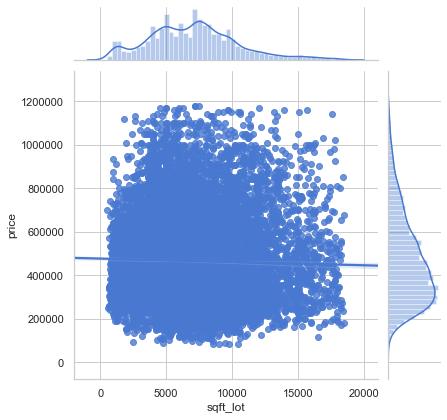

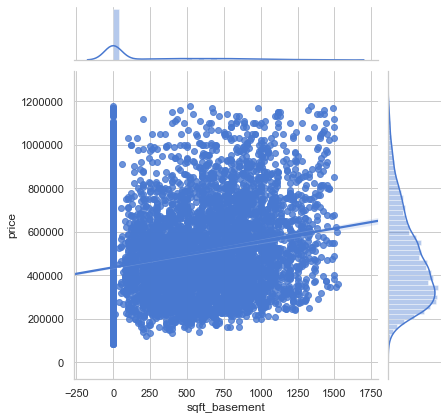

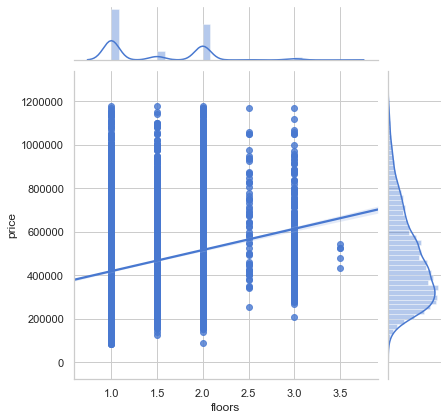

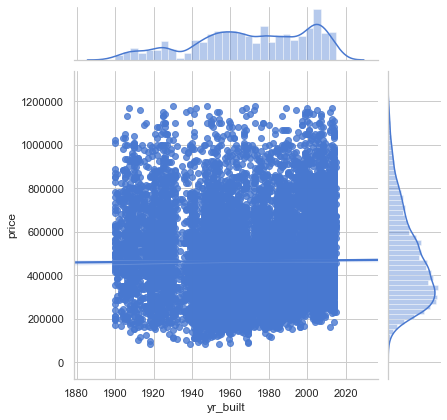

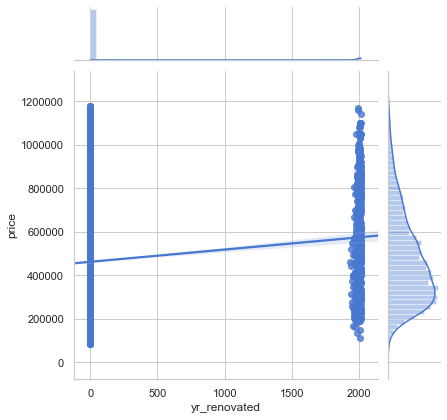

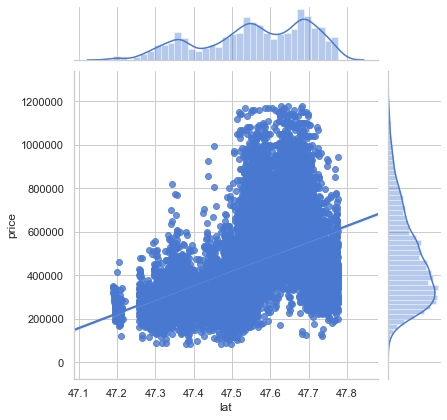

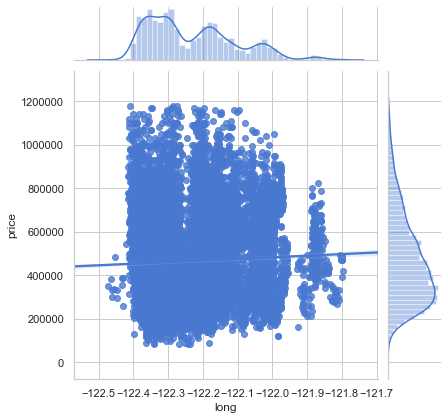

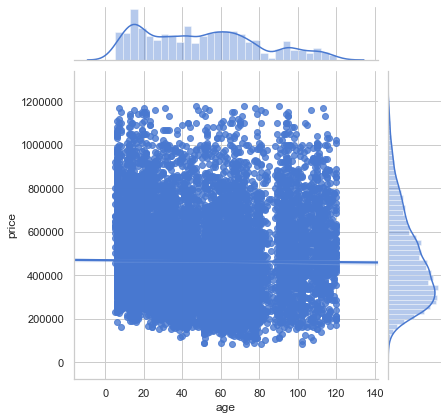

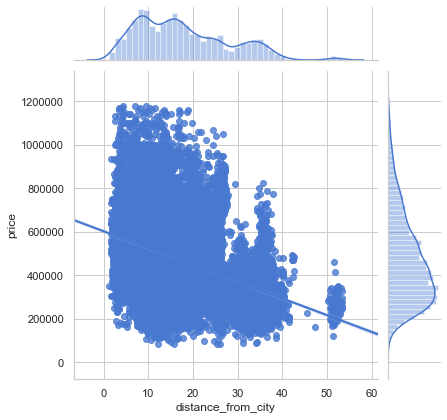

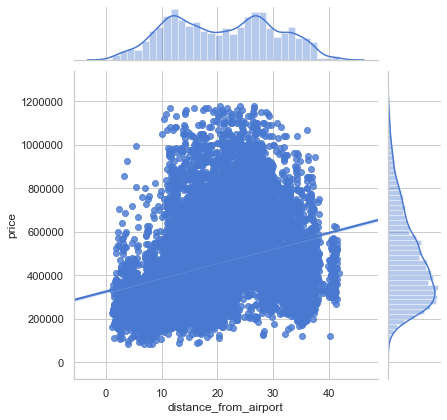

In [62]:
df3 = kc[kc.waterfront == 0]
for col in nominal:
    sns.jointplot(x = col,y ='price',data=df3, kind='reg')

## Effect of Distance from Seattle on the size and cost of a home


C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jrizz_000\anaconda3\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be s

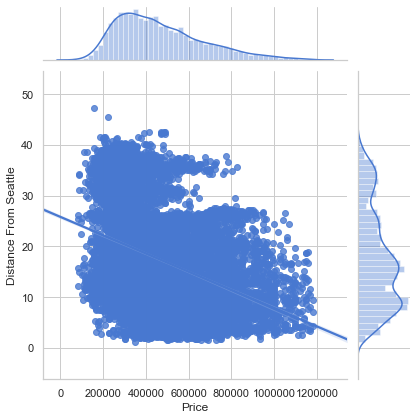

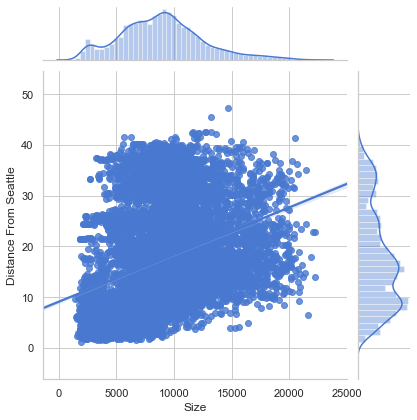

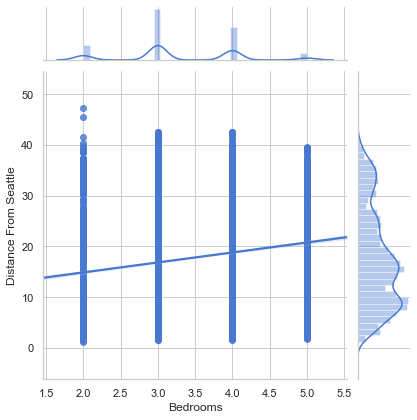

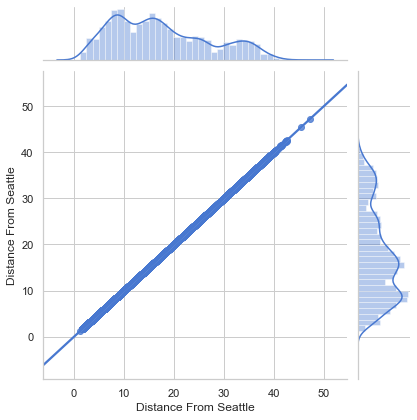

In [75]:
i = kc[kc.distance_from_city < 50]
i['Size'] = i['total_sqft']
i['Price'] = i['price']
i['Bedrooms'] = i['bedrooms']
i['Distance From Seattle'] = i['distance_from_city']
nominall = ['Price', 'Size', 'Bedrooms','Distance From Seattle']
for col in nominall:
    sns.jointplot(x = col ,y ='Distance From Seattle',data=i, kind='reg')

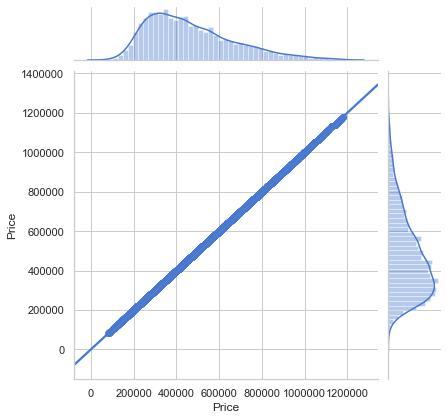

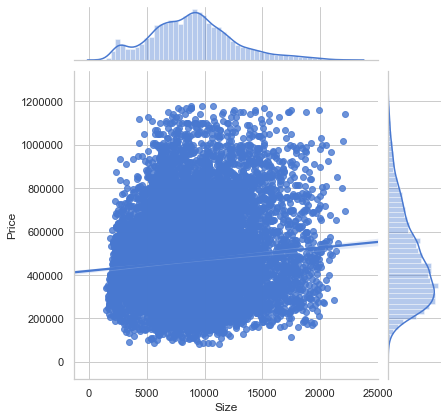

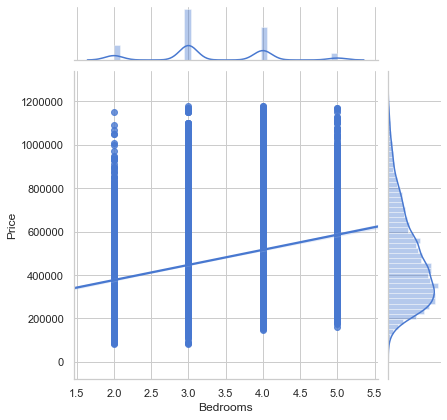

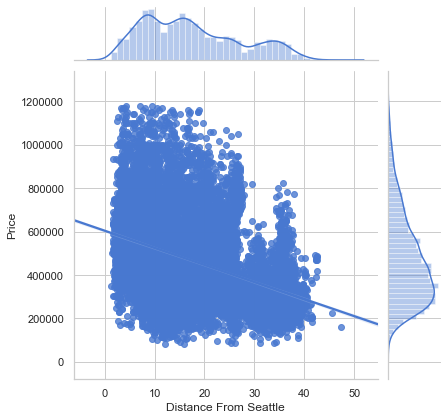

In [76]:
for col in nominall:
    sns.jointplot(x = col ,y ='Price',data=i, kind='reg')

##  2. What effect does waterfront have on the price of a home?


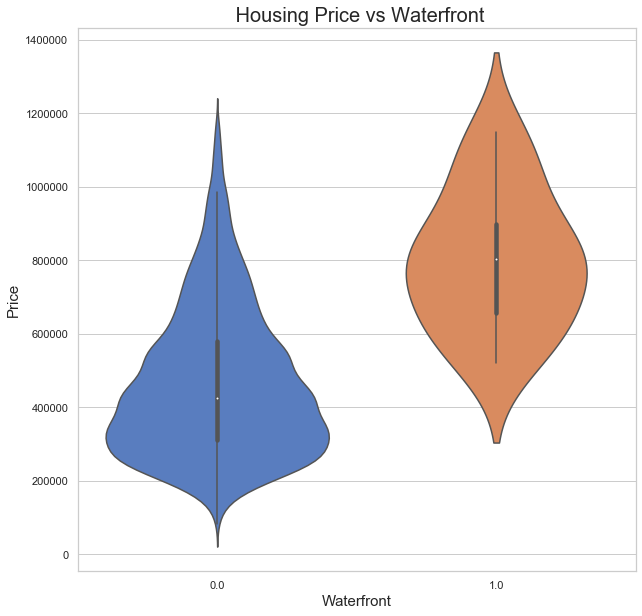

In [53]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'waterfront', y = 'price', data=kc)
plt.title(' Housing Price vs Waterfront', fontsize=20)
plt.xlabel('Waterfront', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

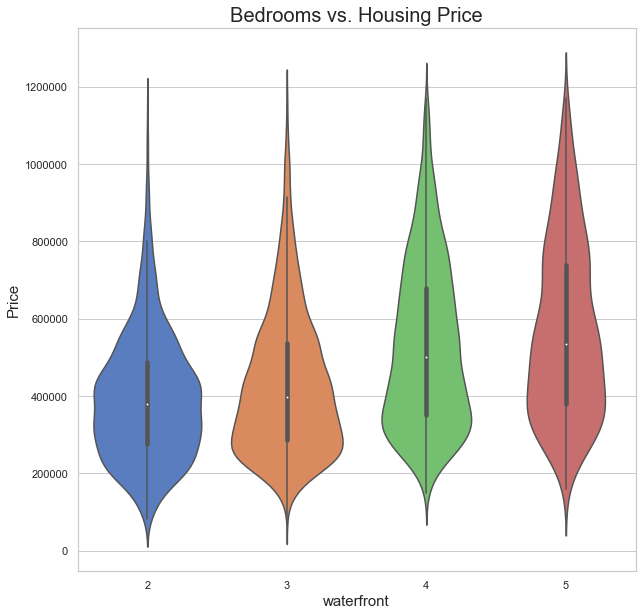

In [65]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.violinplot(x = 'bedrooms', y = 'price', data=kc)
plt.title('Bedrooms vs. Housing Price', fontsize=20)
plt.xlabel('waterfront', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

In [ ]:
kc = kc.drop('sqft_living15', axis=1)
kc = kc.drop('total_sqft_in', axis=1)
kc = kc.drop('sqft_lot15', axis=1)
kc = kc.drop('sqft_above', axis=1)
kc = kc.drop('lat', axis=1)
kc = kc.drop('long', axis=1)
kc = kc.drop('yr_renovated', axis=1)
kc = kc.drop('yr_built', axis=1)
kc = kc.drop('sqft_basement', axis=1)
kc = kc.drop('age_sold', axis=1)

In [ ]:
correlation = kc.corr()

plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, cmap=sns.color_palette('coolwarm'), vmin=-1, fmt = '.1g')

## Normalization


In [ ]:
kc.columns

In [ ]:
totransform =[ 'sqft_living', 'sqft_lot','age','distance_from_city', 'distance_from_airport']

In [ ]:
data = pd.DataFrame(kc[totransform])

def normalize(feature):
    return ((feature - feature.mean()) / feature.std())

data_norm = data.apply(normalize)
data_norm

In [ ]:
# kc.to_csv('kc_norm.csv')
# data_norm.to_csv('data_norm.csv')


In [ ]:
data_norm.head()

## TESTING

In [ ]:
# def loss(h, y):
#   sq_error = (h - y)**2
#   n = len(y)
#   return 1.0 / (2*n) * sq_error.sum()

In [ ]:
# ## making a clase
# import unittest

# class TestLoss(unittest.TestCase):

#   def test_zero_h_zero_y(self):
#     self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

#   def test_one_h_zero_y(self):
#     self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

#   def test_two_h_zero_y(self):
#     self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
#   def test_zero_h_one_y(self):
#     self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
#   def test_zero_h_two_y(self):
#     self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [ ]:
# def run_tests():
#     unittest.main(argv=[''], verbosity = 1, exit= False)
# run_tests()

In [ ]:
# class LinearRegression:
  
#   def predict(self, X):
#     return np.dot(X, self._W)
  
#   def _gradient_descent_step(self, X, targets, lr):

#     predictions = self.predict(X)
    
#     error = predictions - targets
#     gradient = np.dot(X.T,  error) / len(X)

#     self._W -= lr * gradient
      
#   def fit(self, X, y, n_iter=100000, lr=0.01):

#     self._W = np.zeros(X.shape[1])

#     self._cost_history = []
#     self._w_history = [self._W]
#     for i in range(n_iter):
      
#         prediction = self.predict(X)
#         cost = loss(prediction, y)
        
#         self._cost_history.append(cost)
        
#         self._gradient_descent_step(x, y, lr)
        
#         self._w_history.append(self._W.copy())
#     return self

In [ ]:
# from scipy import stats
# from scipy.stats import kurtosis, skew

# for col in cols:
#     kc_kurtosis = kurtosis(kc[col], fisher = True)
#     kc_skew = skew(kc[col])
#     print(col)
#     display('kurtosis: {:.2}'.format(kc_kurtosis))
#     display('skew: {:.2}'.format(kc_skew))

In [ ]:
# kc.show(view=”Scatter”, x=”total_sqft”, y=”price”)

In [ ]:
# intercept = regression_model.intercept_[0]
# coefficient = regression_model.coef_[0][0]

# print("The coeficient for our model is {:.2}".format(coefficient))
# print("The intercept for our model is {:.4}".format(intercept))

In [ ]:
# from sklearn.metrics import mean_absolute_error
# import math

# # calculate the mean squared error
# model_mse = mean_squared_error(y_test, y_predict)

# model_mae= mean_absolute_error(y_test, y_predict)

# model_rmse = math.sqrt(model_mse)

# print('MSE {:.3}'.format(model_mse))
# print('MAE {:.3}'.format(model_mae))
# print('RMSE {:.3}'.format(model_rmse))